In [1]:
import pandas as pd
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_excel(r'C:\Users\lenovo\Data_Science\New folder\data.xlsx')


In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [4]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69300,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [5]:
df.columns     #give column names

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [6]:
del df['id']



In [7]:
#Change the age from days to years
df['age'] = df['age'].map(lambda x : x // 365)
df.head(5)



,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,61,1,155,69.0,130,80,2,2,0,0,1,0
1,40,1,163,71.0,110,70,1,1,0,0,1,1
2,60,1,165,70.0,120,80,1,1,0,0,1,0
3,39,2,165,85.0,120,80,1,1,1,1,1,0
4,64,1,155,62.0,120,80,1,1,0,0,1,0


In [8]:
df.count()

age            69301
gender         69301
height         69301
weight         69301
ap_hi          69301
ap_lo          69301
cholesterol    69301
gluc           69301
smoke          69301
alco           69301
active         69301
cardio         69301
dtype: int64

In [9]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [10]:
df.dtypes

age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [11]:
df.shape

(69301, 12)

In [12]:
df['cardio'].value_counts()
#34679 out of 69301  cases in this dataset are labelled as having no cardiovascular disease,
#and 34622 cases are labelled as having cardiovascular disease. This suggests that the dataset is roughly balanced.



0    34679
1    34622
Name: cardio, dtype: int64

In [13]:
df2=df.copy()


In [14]:
df.info()
#There are no null values in this dataset, and all data values are either ints or floats.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 12 columns):
age            69301 non-null int64
gender         69301 non-null int64
height         69301 non-null int64
weight         69301 non-null float64
ap_hi          69301 non-null int64
ap_lo          69301 non-null int64
cholesterol    69301 non-null int64
gluc           69301 non-null int64
smoke          69301 non-null int64
alco           69301 non-null int64
active         69301 non-null int64
cardio         69301 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.3 MB


In [15]:
print(format(df.duplicated().sum())) # 3164 duplicates???


3164


In [16]:
# Drop duplicates
df.drop_duplicates(inplace=True)
print(format(df.duplicated().sum())) # now 0 duplicates???


0


In [17]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,66137.000000,66137.000000,66137.000000,66137.000000,66137.00000,66137.000000,66137.000000,66137.000000,66137.000000,66137.000000,66137.000000,66137.000000
mean,52.858914,1.356094,164.344376,74.518893,129.24286,97.463689,1.382645,1.236071,0.092036,0.056398,0.798812,0.511832
std,6.803837,0.478847,8.328989,14.566989,158.41772,193.527650,0.690154,0.582018,0.289079,0.230691,0.400892,0.499864
min,29.000000,1.000000,55.000000,10.000000,-150.00000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.00000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.00000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,58.000000,2.000000,170.000000,83.000000,140.00000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.00000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
# BMI is an important feature in predicting the Cardio vascular disease. As this feature is not available, we can calculate 
# it using Height and Weight.
#First convert Height in metres and square it
def bmi_conversion(x):
    x = (x/100)**2
    return x
df['height1'] = df['height'].apply(lambda x: bmi_conversion(x))
df


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height1
0,61,1,155,69.0,130,80,2,2,0,0,1,0,2.4025
1,40,1,163,71.0,110,70,1,1,0,0,1,1,2.6569
2,60,1,165,70.0,120,80,1,1,0,0,1,0,2.7225
3,39,2,165,85.0,120,80,1,1,1,1,1,0,2.7225
4,64,1,155,62.0,120,80,1,1,0,0,1,0,2.4025
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69295,57,1,165,80.0,150,80,1,1,0,0,1,1,2.7225
69297,61,1,158,126.0,140,90,2,2,0,0,1,1,2.4964
69298,52,2,183,105.0,180,90,3,1,0,1,0,1,3.3489
69299,61,1,163,72.0,135,80,1,2,0,0,0,1,2.6569


In [19]:
df['BMI'] = df['weight']/df['height1']
del df['height1']
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,61,1,155,69.0,130,80,2,2,0,0,1,0,28.720083
1,40,1,163,71.0,110,70,1,1,0,0,1,1,26.722873
2,60,1,165,70.0,120,80,1,1,0,0,1,0,25.711662
3,39,2,165,85.0,120,80,1,1,1,1,1,0,31.221304
4,64,1,155,62.0,120,80,1,1,0,0,1,0,25.806452
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69295,57,1,165,80.0,150,80,1,1,0,0,1,1,29.384757
69297,61,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69298,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69299,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


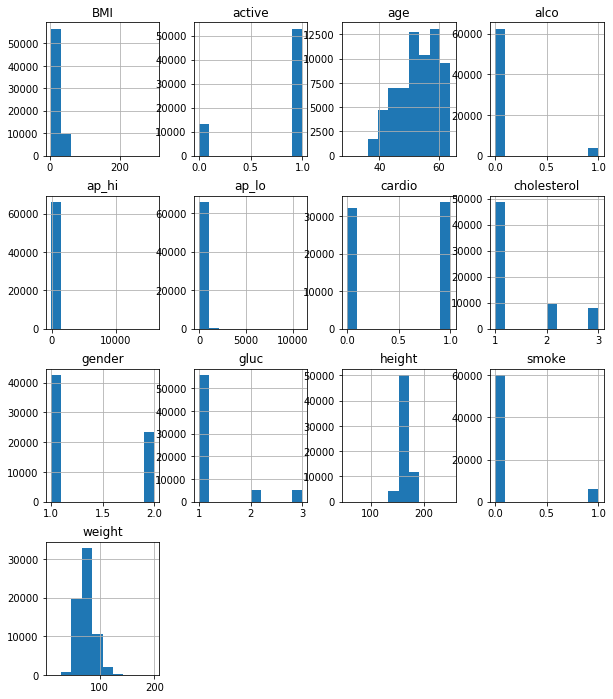

In [20]:
df.hist(figsize=(10,12))
plt.show()


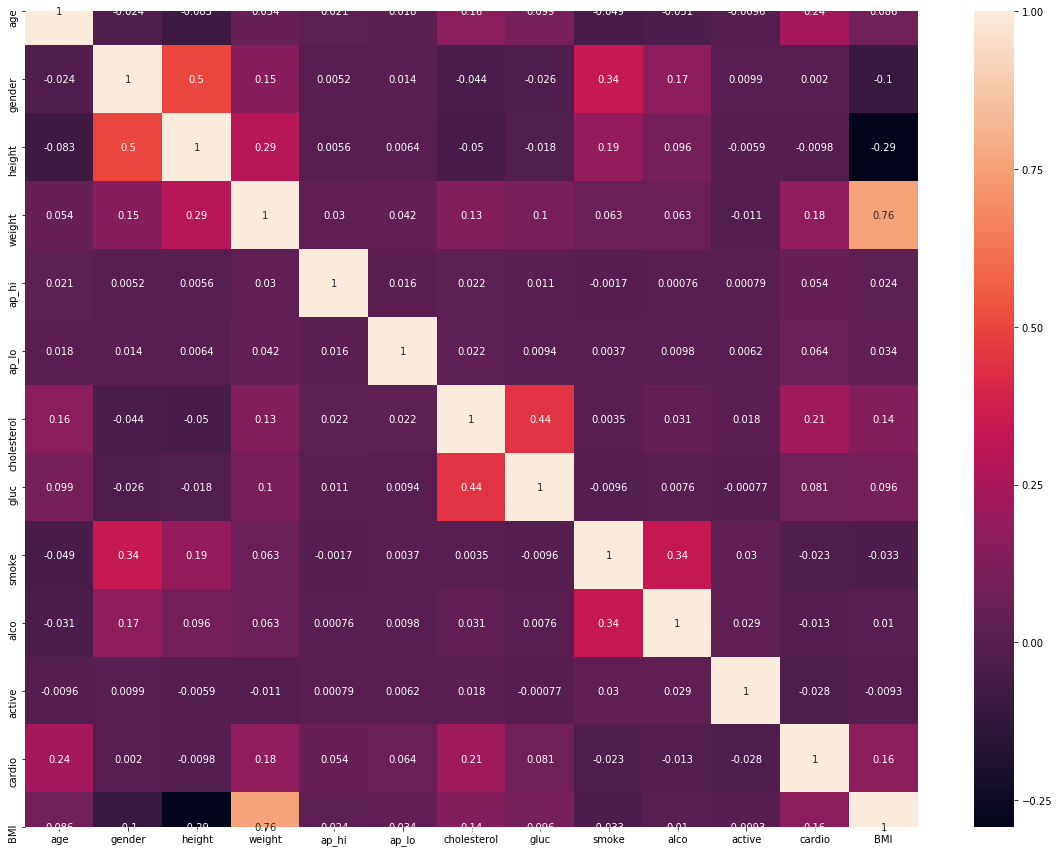

In [21]:
# check correlations
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)


A heatmap shows correlations between variables in the dataset. From the above heatmap, we see that no features directly correlate with the label (cardio) and that generally, there do not exist significant correlations between other variables. However, correlations exist between a select few variables:

1. Height and gender are correlated with a score of 0.5.
2. Glucose and cholesterol are correlated with a score of 0.45.
3. Smoking habits and gender are correlated with a score of 0.34.


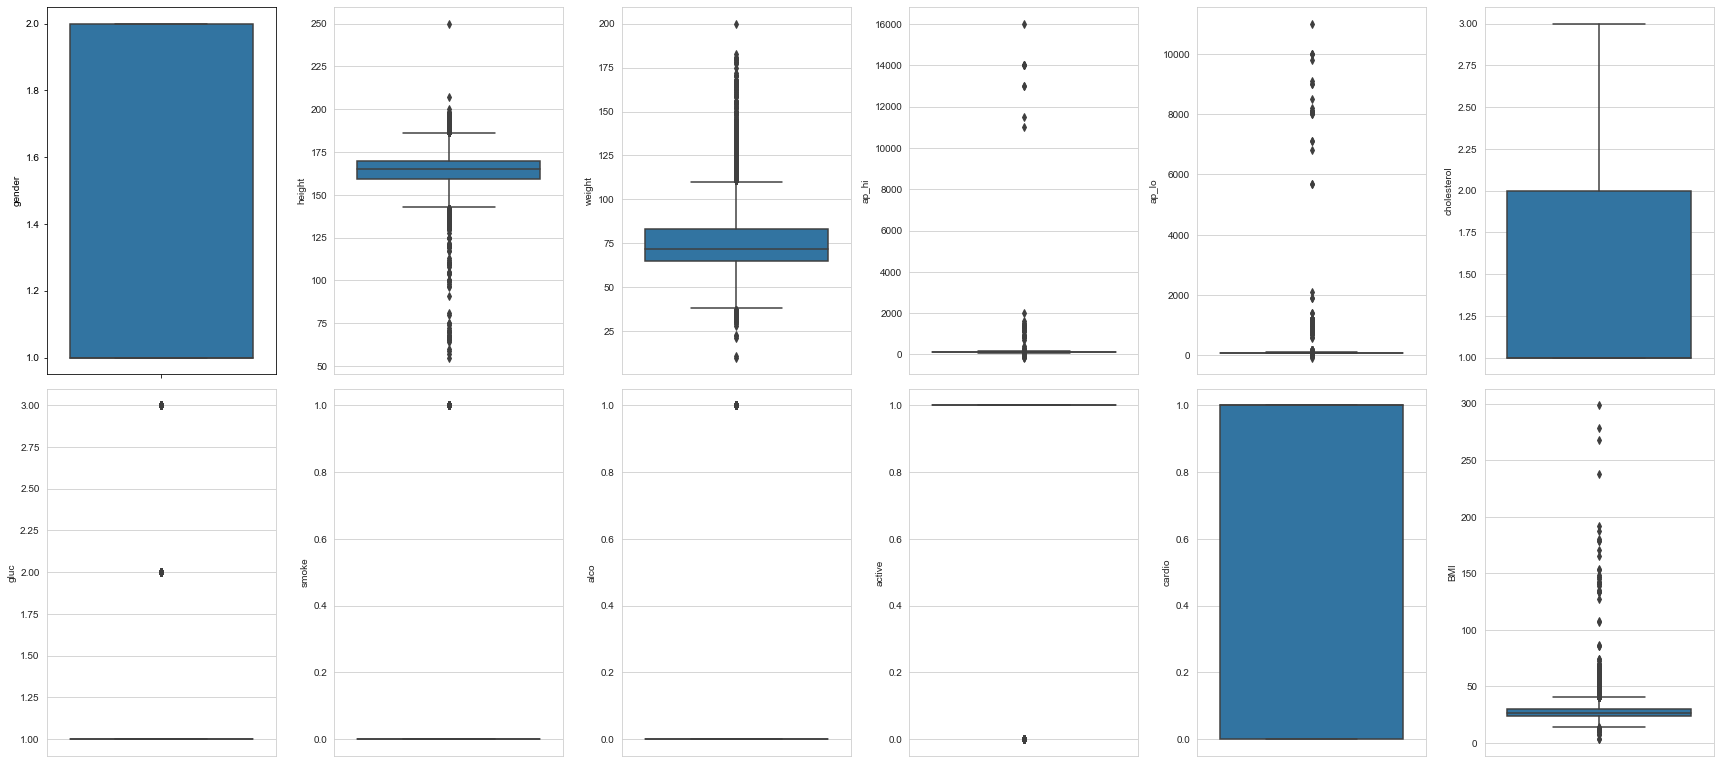

In [22]:
# check outliers

def check_outliers(df):
    l = df.columns.values
    number_of_columns=(len(l)-1)/2
    number_of_rows = 2
    
    plt.figure(figsize=(4*number_of_columns,8*number_of_rows))
    for i in range(1,len(l)):
        plt.subplot(number_of_rows + 1,number_of_columns,i)
        sns.set_style('whitegrid')
        sns.boxplot(df[l[i]],orient='v')
        plt.tight_layout()
        
check_outliers(df)


The above boxplots confirm our suspicion that there are outliers in the dataset. There appear to be several outliers in the systolic and diastolic variables (ap_hi and ap_lo). These outliers might be explained by human error when entering data into the excel format. Our prediction model might benefit if these outliers were removed from the data.



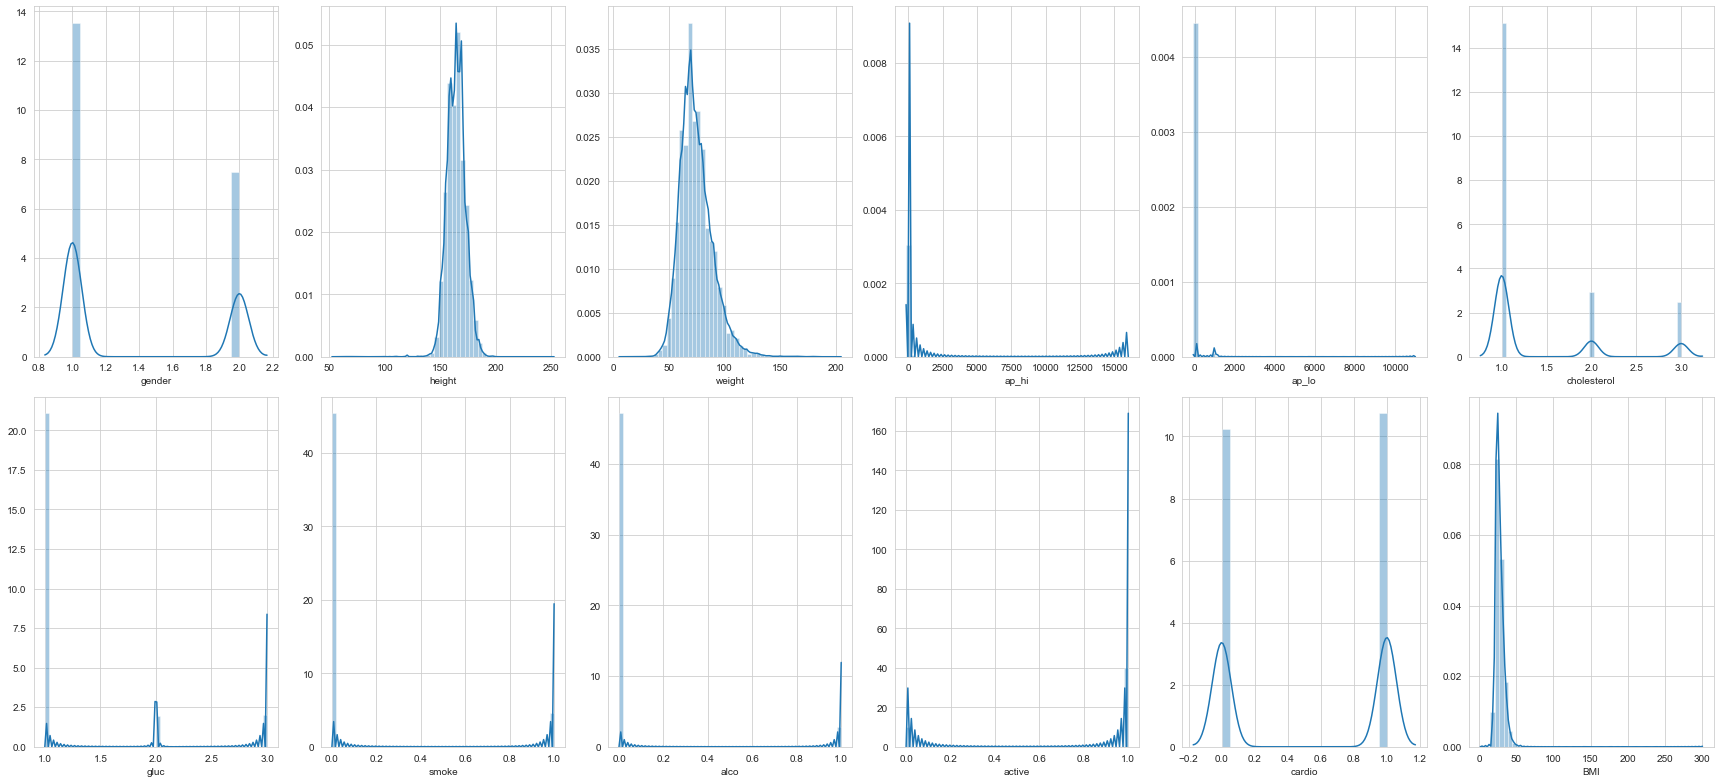

In [23]:
# check distribution and skew
def check_dist(df):
    l = df.columns.values
    number_of_columns=(len(l)-1)/2
    number_of_rows = 2
    
    plt.figure(figsize=(4*number_of_columns,8*number_of_rows))
    for i in range(1,len(l)):
        plt.subplot(number_of_rows+1,number_of_columns,i)
        sns.distplot(df[l[i]],kde=True) 
        plt.tight_layout()
        
check_dist(df)


Histograms show the distribution of each feature in the dataset. There appears to be some variation in age, but height and weight are roughly normally distributed. However, the histograms further suggest the presence of outliers in the blood pressure features. Moreover, there exist categorical features in the dataset, such as gender, cholesterol, glucose, smoking habits, alcohol use, and activity.



In [24]:
#Outlier Detection
#Systolic BP(ap_hi) not greater than 370 and not less than 70
#Dialstolic BP(ap_lo) not greater than 360 and not less than 50
outlier = (df2['ap_hi'] >= 370)| (df2['ap_hi'] <= 70)|(df2['ap_lo']>= 360)|(df2['ap_lo']<=50)
df2[outlier].count()


age            1297
gender         1297
height         1297
weight         1297
ap_hi          1297
ap_lo          1297
cholesterol    1297
gluc           1297
smoke          1297
alco           1297
active         1297
cardio         1297
dtype: int64

In [25]:
df2= df2[~outlier]
df2.shape


(68004, 12)

In [26]:
# BMI is an important feature in predicting the Cardio vascular disease. As this feature is not available, we can calculate 
# it using Height and Weight.
#First convert Height in metres and square it
def bmi_conversion(x):
    x = (x/100)**2
    return x
df2['height1'] = df2['height'].apply(lambda x: bmi_conversion(x))
df2


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height1
0,61,1,155,69.0,130,80,2,2,0,0,1,0,2.4025
1,40,1,163,71.0,110,70,1,1,0,0,1,1,2.6569
2,60,1,165,70.0,120,80,1,1,0,0,1,0,2.7225
3,39,2,165,85.0,120,80,1,1,1,1,1,0,2.7225
4,64,1,155,62.0,120,80,1,1,0,0,1,0,2.4025
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,52,2,168,76.0,120,80,1,1,1,0,1,0,2.8224
69297,61,1,158,126.0,140,90,2,2,0,0,1,1,2.4964
69298,52,2,183,105.0,180,90,3,1,0,1,0,1,3.3489
69299,61,1,163,72.0,135,80,1,2,0,0,0,1,2.6569


In [27]:
df2.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height1
age,1.000000,-0.023981,-0.081651,0.054340,0.207440,0.152661,0.155015,0.099094,-0.047769,-0.028437,-0.010610,0.238992,-0.082616
gender,-0.023981,1.000000,0.499668,0.156000,0.061064,0.066144,-0.037381,-0.021870,0.337995,0.171247,0.006180,0.007458,0.510097
height,-0.081651,0.499668,1.000000,0.290702,0.017257,0.033748,-0.051272,-0.019153,0.188329,0.094679,-0.006820,-0.011494,0.997096
weight,0.054340,0.156000,0.290702,1.000000,0.269124,0.249655,0.140919,0.107136,0.067894,0.068463,-0.017216,0.179626,0.298459
ap_hi,0.207440,0.061064,0.017257,0.269124,1.000000,0.702674,0.193030,0.093054,0.027882,0.033359,-0.001275,0.424384,0.018442
ap_lo,0.152661,0.066144,0.033748,0.249655,0.702674,1.000000,0.159250,0.077418,0.025292,0.043251,0.001006,0.336722,0.035127
cholesterol,0.155015,-0.037381,-0.051272,0.140919,0.193030,0.159250,1.000000,0.451424,0.009874,0.036150,0.008627,0.220922,-0.051485
gluc,0.099094,-0.021870,-0.019153,0.107136,0.093054,0.077418,0.451424,1.000000,-0.005352,0.011484,-0.007857,0.089767,-0.019593
smoke,-0.047769,0.337995,0.188329,0.067894,0.027882,0.025292,0.009874,-0.005352,1.000000,0.339325,0.025338,-0.015741,0.192620
alco,-0.028437,0.171247,0.094679,0.068463,0.033359,0.043251,0.036150,0.011484,0.339325,1.000000,0.025304,-0.007829,0.097114


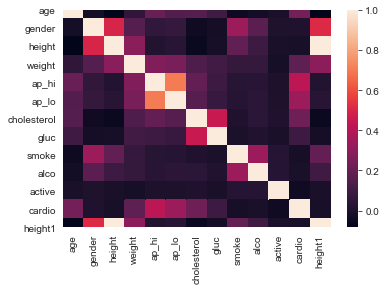

In [28]:
sns.heatmap(df2.corr())

In [29]:
# Import train_test_split and divide data into X and y components
from sklearn.model_selection import train_test_split

y = df['cardio']
X = df.drop(['cardio'], axis=1, inplace=False)
X.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI
0,61,1,155,69.0,130,80,2,2,0,0,1,28.720083
1,40,1,163,71.0,110,70,1,1,0,0,1,26.722873
2,60,1,165,70.0,120,80,1,1,0,0,1,25.711662
3,39,2,165,85.0,120,80,1,1,1,1,1,31.221304
4,64,1,155,62.0,120,80,1,1,0,0,1,25.806452


In [30]:
from sklearn.preprocessing import StandardScaler #scaling--ensure that all data in a dataset falls in the same range
sc = StandardScaler()
X = sc.fit_transform(X) #training the machine


In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,                                
                                                    test_size = 0.25, 
                                                    random_state = 42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 49602 samples.
Testing set has 16535 samples.


AUC of Logistic Regression: 0.7818813854757605
Accuracy of Logistic Regression: 0.7203507710916238


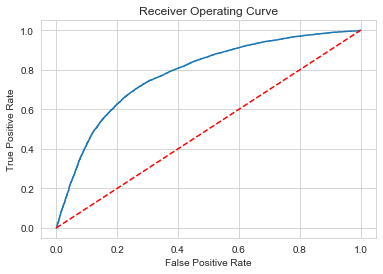

In [32]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
Y_pred = lr.predict(X_test)
fpr1,tpr1,thresholds = roc_curve(y_test,lr.predict_proba(X_test)[:,1])
lr_a = auc(fpr1,tpr1)
lr_acc = lr.score(X_test,y_test)
print('AUC of Logistic Regression:',lr_a)
print('Accuracy of Logistic Regression:',lr_acc)
plt.figure()
plt.plot(fpr1,tpr1)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Curve')
plt.show()



In [33]:
#GridSearch cross validation for logistic regresssion
from sklearn.model_selection import GridSearchCV
log_reg = LogisticRegression(solver="liblinear")
grid = {"penalty" : ["l1","l2"], "C" : np.arange(10,50,5)}
log_reg_cv = GridSearchCV(log_reg, grid, cv = 3)
log_reg_cv.fit(X_train,y_train)
print("Tuned hyperparameter: {}".format(log_reg_cv.best_params_))


Tuned hyperparameter: {'C': 20, 'penalty': 'l2'}


In [34]:
logreg_best = LogisticRegression(C = 25, penalty = "l1",solver = "liblinear")
logreg_best.fit(X_train,y_train)
probs = logreg_best.predict_proba(X_test)[:,1]
fpr2,tpr2,thresholds = roc_curve(y_test,probs)
lr_best_a = auc(fpr2,tpr2)
lr_best_acc = logreg_best.score(X_test,y_test)


AUC of Logistic Regression(tuned): 0.7821081868428743
Accuracy of Logistic Regression(tuned): 0.7207741155125491


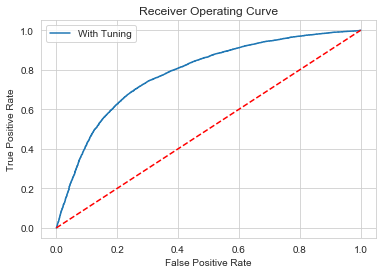

In [35]:
print('AUC of Logistic Regression(tuned):',lr_best_a)
print('Accuracy of Logistic Regression(tuned):',lr_best_acc)
plt.figure()
plt.plot(fpr2,tpr2,label = 'With Tuning')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()


In [36]:
# Import DecissionTree classification model from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

DT_predictor = DecisionTreeClassifier(max_depth=3, min_samples_split=50, min_samples_leaf=50, random_state=42)
DT_predictor.fit(X_train, y_train)
y_predicted = DT_predictor.predict(X_test)
y_predicted


array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [37]:
# Evaluate the model
print("Confussion Matrix")
print("------------------------------------------------------")
print(confusion_matrix(y_test,y_predicted))
print("------------------------------------------------------")
print("Classification Report")
print("------------------------------------------------------")
print(classification_report(y_test,y_predicted))
print("------------------------------------------------------")
DT_accuracy = round(accuracy_score(y_test, y_predicted), 2)
print("Overall accuracy score: " + str(DT_accuracy))
print("------------------------------------------------------")


Confussion Matrix
------------------------------------------------------
[[6140 1949]
 [2648 5798]]
------------------------------------------------------
Classification Report
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      8089
           1       0.75      0.69      0.72      8446

    accuracy                           0.72     16535
   macro avg       0.72      0.72      0.72     16535
weighted avg       0.72      0.72      0.72     16535

------------------------------------------------------
Overall accuracy score: 0.72
------------------------------------------------------


In [38]:
# Install pydotplus package into the kernel
!pip install pydotplus


In [39]:
# Import Random Forest classification model from sklearn
from sklearn.ensemble import RandomForestClassifier

RF_predictor = RandomForestClassifier(n_estimators=50, random_state=17)
RF_predictor.fit(X_train, y_train)
y_predicted = RF_predictor.predict(X_test)
y_predicted


array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [40]:
# Evaluate the model
print("------------------------------------------------------") 
print("Confussion Matrix")
print("------------------------------------------------------")
print(confusion_matrix(y_test,y_predicted))
print("------------------------------------------------------")
print("Classification Report")
print("------------------------------------------------------")
print(classification_report(y_test,y_predicted))
print("------------------------------------------------------")
RF_accuracy = round(accuracy_score(y_test, y_predicted), 2)
print("Overall accuracy score: " + str(RF_accuracy))
print("------------------------------------------------------")


------------------------------------------------------
Confussion Matrix
------------------------------------------------------
[[5606 2483]
 [2489 5957]]
------------------------------------------------------
Classification Report
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      8089
           1       0.71      0.71      0.71      8446

    accuracy                           0.70     16535
   macro avg       0.70      0.70      0.70     16535
weighted avg       0.70      0.70      0.70     16535

------------------------------------------------------
Overall accuracy score: 0.7
------------------------------------------------------


In [41]:
# Feature Scaling, required by SVM and KNN algorithms
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Import SVM classification model from sklearn
from sklearn.svm import SVC

SV_classifier = SVC(kernel='linear')
SV_classifier.fit(X_train, y_train)
y_predicted = SV_classifier.predict(X_test)
y_predicted


array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [42]:
# Evaluate the model
print("------------------------------------------------------") 
print("Confussion Matrix")
print("------------------------------------------------------")
print(confusion_matrix(y_test,y_predicted))
print("------------------------------------------------------")
print("Classification Report")
print("------------------------------------------------------")
print(classification_report(y_test,y_predicted))
print("------------------------------------------------------")
SV_accuracy = round(accuracy_score(y_test, y_predicted), 2)
print("Overall accuracy score: " + str(SV_accuracy))
print("------------------------------------------------------")


------------------------------------------------------
Confussion Matrix
------------------------------------------------------
[[6309 1780]
 [2854 5592]]
------------------------------------------------------
Classification Report
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.78      0.73      8089
           1       0.76      0.66      0.71      8446

    accuracy                           0.72     16535
   macro avg       0.72      0.72      0.72     16535
weighted avg       0.72      0.72      0.72     16535

------------------------------------------------------
Overall accuracy score: 0.72
------------------------------------------------------


In [43]:
# Import KNN classification model from sklearn
from sklearn.neighbors import KNeighborsClassifier

KNN_classifier = KNeighborsClassifier(n_neighbors=25)
KNN_classifier.fit(X_train, y_train)
y_predicted = KNN_classifier.predict(X_test)
y_predicted


array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [44]:
# Evaluate the model
print("------------------------------------------------------") 
print("Confussion Matrix")
print("------------------------------------------------------")
print(confusion_matrix(y_test,y_predicted))
print("------------------------------------------------------")
print("Classification Report")
print("------------------------------------------------------")
print(classification_report(y_test,y_predicted))
print("------------------------------------------------------")
KNN_accuracy = round(accuracy_score(y_test, y_predicted), 2)
print("Overall accuracy score: " + str(KNN_accuracy))
print("------------------------------------------------------")


------------------------------------------------------
Confussion Matrix
------------------------------------------------------
[[5364 2725]
 [2891 5555]]
------------------------------------------------------
Classification Report
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.66      0.66      8089
           1       0.67      0.66      0.66      8446

    accuracy                           0.66     16535
   macro avg       0.66      0.66      0.66     16535
weighted avg       0.66      0.66      0.66     16535

------------------------------------------------------
Overall accuracy score: 0.66
------------------------------------------------------


In [45]:
# Compare accuracy of the four classification models
compare_scores = {'Decission Tree': DT_accuracy, 'Random Forest': RF_accuracy, 'Support Vector Machine (SVM)': SV_accuracy, 'K Nearest Neighbors (KNN)': KNN_accuracy}
compare_scores


{'Decission Tree': 0.72,
 'Random Forest': 0.7,
 'Support Vector Machine (SVM)': 0.72,
 'K Nearest Neighbors (KNN)': 0.66}

In [46]:
df1=df.copy()

In [47]:
df1['body_mass'] = df1.weight / ((df1.height)/100)**2
df1

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,body_mass
0,61,1,155,69.0,130,80,2,2,0,0,1,0,28.720083,28.720083
1,40,1,163,71.0,110,70,1,1,0,0,1,1,26.722873,26.722873
2,60,1,165,70.0,120,80,1,1,0,0,1,0,25.711662,25.711662
3,39,2,165,85.0,120,80,1,1,1,1,1,0,31.221304,31.221304
4,64,1,155,62.0,120,80,1,1,0,0,1,0,25.806452,25.806452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69295,57,1,165,80.0,150,80,1,1,0,0,1,1,29.384757,29.384757
69297,61,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,50.472681
69298,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,31.353579
69299,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,27.099251


body mass less than 18 is underweight, from 18 to 27 is healthy, from 27 to 30 is overweight and more than 30 is severe overweight



In [48]:
def get_body_mass_type(body_mass):
    if body_mass < 18 :
        return 'underweight'
    elif body_mass <= 27 : # relaxing this threshold a liitle bit
        return 'healthy' 
    elif body_mass <= 30 :
        return 'overweight'
    else :
        return 'sever_overweight'     
df1['body_mass_type'] = df1['body_mass'].apply(lambda m: get_body_mass_type(m))  # take the bodymass and return it's type
df1


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,body_mass,body_mass_type
0,61,1,155,69.0,130,80,2,2,0,0,1,0,28.720083,28.720083,overweight
1,40,1,163,71.0,110,70,1,1,0,0,1,1,26.722873,26.722873,healthy
2,60,1,165,70.0,120,80,1,1,0,0,1,0,25.711662,25.711662,healthy
3,39,2,165,85.0,120,80,1,1,1,1,1,0,31.221304,31.221304,sever_overweight
4,64,1,155,62.0,120,80,1,1,0,0,1,0,25.806452,25.806452,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69295,57,1,165,80.0,150,80,1,1,0,0,1,1,29.384757,29.384757,overweight
69297,61,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,50.472681,sever_overweight
69298,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,31.353579,sever_overweight
69299,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,27.099251,overweight


In [63]:
def get_ap_type(df1):
    if ( (df1.ap_hi <= 90) | (df1.ap_lo <= 60) ) : # 90 or less high or 60 or less low
        return 'hypotension'
    elif ( (df1.ap_hi <= 120) & (df1.ap_lo <= 80) ) : # 120 or less high and 80 or less low
        return 'normal' 
    elif ( (df1.ap_hi <= 129) & (df1.ap_lo <= 80) ): # 120 to 129 high and 80 or less low
        return 'elevated'
    elif ( (df1.ap_hi <= 139) | (df1.ap_lo <= 89) ): # 130 to 139 high and 89 or less
        return 'stage1_hypertension'
    elif ( (df1.ap_hi >= 180) | (df1.ap_lo >= 120) ): # 180 or higher high and 120 or higher low
        return 'hypertensive_crisis'  
    else : # (less than 180 and greater than 139 high ) or/and (less than 120 and greater than 89 low)
        return 'stage2_hypertension'    

   

In [64]:
df1

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,body_mass,body_mass_type
0,61,1,155,69.0,130,80,2,2,0,0,1,0,28.720083,28.720083,overweight
1,40,1,163,71.0,110,70,1,1,0,0,1,1,26.722873,26.722873,healthy
2,60,1,165,70.0,120,80,1,1,0,0,1,0,25.711662,25.711662,healthy
3,39,2,165,85.0,120,80,1,1,1,1,1,0,31.221304,31.221304,sever_overweight
4,64,1,155,62.0,120,80,1,1,0,0,1,0,25.806452,25.806452,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69295,57,1,165,80.0,150,80,1,1,0,0,1,1,29.384757,29.384757,overweight
69297,61,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,50.472681,sever_overweight
69298,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,31.353579,sever_overweight
69299,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,27.099251,overweight
